# Enquête Digit_Hum 2023 « Manipuler des données en Sciences humaines et sociales (SHS) : R, Python, ou autre ? »

Notebook créé en mai 2023 (dernière révision le 30/11/2023) par Emilien Schultz pour traiter les résultats du [sondage diffusé du 27 mars au 28 avril 2023](https://framaforms.org/manipuler-des-donnees-en-sciences-humaines-et-sociales-shs-r-python-ou-autre-1675889669).

*L'enquête a été préparée par les membres de l&#39;initiative Digit_Hum (ENS PSL), Marie-Laure Massot (CNRS, CAPHÉS) et Agnès Tricoche (CNRS, AOROC), avec le concours de Veronika Fedotova (Master 2 Humanités Numériques, Université Sorbonne Nouvelle) et en collaboration avec Emilien Schultz (chercheur en sociologie au médialab de SciencesPo). Dernière modification le 20/09/2023.*


## Méthodologie et type de données

Ce sondage était destiné à tous les personnels impliqués dans la recherche et / ou l'enseignement en sciences humaines et sociales mobilisant du traitement de
données (humanités numériques, sciences sociales computationnelles, etc.). Il a été diffusé sur la liste de diffusions DH, sur les sites de l’Observatoire des Humanités numériques de l’ENS PSL et de l’INSHS du CNRS.

L’enquête visait à mieux connaître les usages de la programmation chez les chercheurs, enseignants-chercheurs, étudiants et personnels de soutien à la recherche. Les résultats obtenus permettent de proposer un état des lieux de l’existant afin d’accompagner et d’améliorer les pratiques en proposant des ressources pour s’informer ou se former.

217 personnes ont répondu à cette enquête ce qui nous a permis de dresser un panorama réaliste des pratiques actuelles relevant de la programmation en SHS.

## Table des matières

1. Préparation des données
2. Nettoyage des données et standardisation

3. Description de l’échantillon
4. Analyse des résultats spécifiques à la programmation scientifique
5. Focus sur les usages des carnets interactifs
6. Ressources liées

## Citation

*Enquête Digit_Hum « Manipuler des données en Sciences humaines et sociales (SHS) : R, Python, ou autre ? » rapport, Marie-Laure Massot, Agnès Tricoche et Emilien Schultz, septembre 2023. (Notebook déposé dans HAL et consultable sur le site Digit_Hum, rubrique enquête).*

## 1. Préparation des données

### 1.1 Import des bibliothèques

In [1]:
#pip install -r requirements.txt

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pyshs
import json
import requests

import warnings # éviter les warnings
warnings.simplefilter('ignore')

### 1.2 Import des données issues du questionnaire

En local

In [ ]:
data = pd.read_csv("./manipuler_des_donnees_en_sciences_humaines_et_sociales_shs___r_python_ou_autre_2023_05_03.csv",sep=";", skiprows=[0,1])

En ligne

In [2]:
url = "https://raw.githubusercontent.com/emilienschultz/digithum_survey/main/manipuler_des_donnees_en_sciences_humaines_et_sociales_shs___r_python_ou_autre_2023_05_03.csv"
data = pd.read_csv(url,sep=";", skiprows=[0,1])

## 2. Nettoyage des données et standardisation

### 2.1 Recodage du nom des variables

Pour avoir des noms de colonnes plus lisibles à partir de la sortie de l'interface de sondage (Framaforms)

En local

In [ ]:
json.dump(reco,open("./reco_columns.json","w"))
reco = json.load(open("./reco_columns.json","r"))

En ligne

In [3]:
url = "https://raw.githubusercontent.com/emilienschultz/digithum_survey/main/reco_columns.json"
reco = json.loads(requests.get(url).content)

In [4]:
data = data.rename(columns= reco)
data = data.drop(columns="drop")
print(data.shape)
data.columns

(216, 80)


Index(['heure', 'genre', 'statut', 'autre', 'contrat', 'age',
       'disc_Anthropologie', 'disc_Archéologie', 'disc_Economie',
       'disc_Géographie', 'disc_Histoire', 'disc_Linguistique',
       'disc_Littérature', 'disc_Philosophie', 'disc_Psychologie',
       'disc_Sociologie', 'disc_Autre', 'prog_A+', 'prog_Bash', 'prog_C',
       'prog_Java', 'prog_JavaScript', 'prog_Julia', 'prog_Pascal',
       'prog_Perl', 'prog_PHP', 'prog_Python', 'prog_R', 'prog_Rust',
       'prog_Swift', 'prog_SQL', 'prog_Autre', 'prog_Autre_lang',
       'donnees_Image', 'donnees_Son', 'donnees_Vidéo', 'donnees_Texte',
       'donnees_Géographique', 'donnees_Numérique', 'donnees_autres',
       'entendu_python', 'familiarite_python', 'experience_python',
       'activite_python', 'niveau_python', 'pratique_python',
       'exemples_python', 'temps_python', 'collegues_python',
       'traitements_python', 'ressources_python', 'entendu_r', 'familiarite_r',
       'experience_r', 'activite_r', 'niveau_r',

### 2.2 Nettoyage des données et recodage des variables

Recodage des modalités des questions :

- les disciplines ont été recodées à la main dans un fichier reco_disciplines.xlsx (il manquait des options dans le questionnaire donc les répondants ont précisé leurs discipline)
- plusieurs recodages ont été fait pour réduire le nombre de modalités et la taille des labels

In [6]:
#enlever si l'âge n'est pas mentionné
f_missing = data["age"].notna()
data = data[f_missing]

# recodage des discisciplines : sortie des disciplines autres > recodage manuel
# data[["disc_Autre"]].dropna().to_excel("reco_disciplines.xlsx")

# en local
#reco_disc = pd.read_excel("reco_disciplines.xlsx")

# en ligne
url = "https://raw.githubusercontent.com/emilienschultz/digithum_survey/main/reco_disciplines.csv"
reco_disc = pd.read_csv(url,sep=";")

data["disc_Autre_reco"] = reco_disc.set_index("Unnamed: 0")["Recodage"]
disc = ['disc_Anthropologie',
 'disc_Archéologie',
 'disc_Economie',
 'disc_Géographie',
 'disc_Histoire',
 'disc_Linguistique',
 'disc_Littérature',
 'disc_Philosophie',
 'disc_Psychologie',
 'disc_Sociologie',
 'disc_Autre_reco']
for i in disc[:-1]:
    data[i+"_reco"] = data[i].apply(lambda x : i.replace("disc_","") if pd.notnull(x) else x)
def vers_liste(x):
    return list(set([i for i in list(x) if type(i)==str]))
data["disciplines"] = data[[i for i in data.columns if "disc" in i and "reco" in i]].apply(vers_liste,axis=1)


reco = {"Je l'utilise, à un niveau débutant":"2. Use it (beginner)",
       "Je l'utilise, à un niveau intermédiaire":"3. Use it (intermediary)",
       "J'en ai juste entendu parlé":"1. Heard about it", "Je l'utilise, à un niveau avancé":"4. Use it (advanced)",
       "J'en ai juste entendu parler":"1. Heard about it","Je ne connais pas":"0. Don't know"}
reco = {"Je l'utilise, à un niveau débutant":"2-usage débutant",
       "Je l'utilise, à un niveau intermédiaire":"3-usage intermédiaire",
       "J'en ai juste entendu parlé":"1-entendu parlé", "Je l'utilise, à un niveau avancé":"4-usage avancé",
       "J'en ai juste entendu parler":"1-entendu parlé","Je ne connais pas":"NA"}
data["familiarite_python"] = data["familiarite_python"].replace(reco).fillna("NA")
data["familiarite_notebook"] = data["familiarite_notebook"].replace(reco)#.fillna("0. Don't know")
data["familiarite_r"] = data["familiarite_r"].replace(reco).fillna("NA")
reco = {'46 - 55 ans': '5. 46 - 55',
 '26 - 35 ans': '2. 26 - 35',
 'Moins de 25 ans': '1. <25',
 '36 - 45 ans': '3. 36 - 45',
 'Plus de 56 ans': '5. >56'}
data["age"] = data["age"].replace(reco)

reco = {"Oui, à la fois pour la recherche et pour l'enseignement":"4. Teaching and research",
       'Oui, pour la recherche':"2. Only research", 'Non':"1. No", "Oui, pour l'enseignement":"3. Only teaching"}
reco = {"Oui, à la fois pour la recherche et pour l'enseignement":"4-Enseignement et recherche",
       'Oui, pour la recherche':"2-Que recherche", 'Non':"1-Nono", "Oui, pour l'enseignement":"3-Enseignement"}
data["experience_notebook"] = data["experience_notebook"].replace(reco)

reco = {'0 à 3 ans':"0-3",  '3 à 5 ans':"3-5", '5 à 10 ans':"5-10"}
data["temps_notebook"] = data["temps_notebook"].replace(reco)

reco = {'Oui, un peu':"2-Oui, quelques uns", 'Oui, beaucoup':"2-Oui, beaucoup", 'Non':"1-Non"}
data["collegue_notebook"] = data["collegue_notebook"].replace(reco)

reco = {'Oui, plutôt':"2-Oui, plutôt", 'Oui, beaucoup':"3-Oui, beaucoup", 'Je ne sais pas':"4-NSP",
       'Non, pas du tout':"1-Non, pas du tout"}
data["progsci_shs"] = data["progsci_shs"].replace(reco)

## 3. Description de l'échantillon

### 3.1 Variables socio-professionnelles

In [ ]:
pd.concat({"Age":pyshs.tri_a_plat(data,"age"),
 "Genre":pyshs.tri_a_plat(data,"genre"),
 "Statut":pyshs.tri_a_plat(data,"statut"),
 "Type de contrat":pyshs.tri_a_plat(data,"contrat"),
          })

Effectif  Pourcentage (%)
Age             1. <25                                 19.0              9.2
                2. 26 - 35                             80.0             38.8
                3. 36 - 45                             51.0             24.8
                5. 46 - 55                             39.0             18.9
                5. >56                                 17.0              8.3
                Total                                 206.0            100.0
Genre           Autre                                   6.0              2.9
                F                                     102.0             50.0
                H                                      96.0             47.1
                Total                                 204.0            100.0
Statut          Chercheur                              23.0             11.2
                Doctorant                              45.0             21.8
                Enseignant-chercheur                   39.0             18.9
                Etudiant (jusqu'au master 2)           19.0              9.2
                Ingénieur d'études                     45.0             21.8
                Ingénieur de recherche                 18.0              8.7
                Post-doctorant                         17.0              8.3
                Total                                 206.0             99.9
Type de contrat CDI de droit privé                     16.0              8.2
                Non titulaire (CDD)                    84.0             42.9
                Titulaire de la fonction publique      96.0             49.0
                Total                                 196.0            100.1

Remarque : certaines non-réponses font que les totaux varient

### 3.2 Disciplines

Il peut y avoir plusieurs disciplines mentionnées par les répondants notamment sur les aspects interdisciplinaires, pour cette raison le pourcentage représente la proportion de répondants qui ont mentionnés au moins cette discipline.

In [ ]:
disciplines = set([j for i in list(data["disciplines"]) for j in i])
pd.Series(
    {d:round(100*data["disciplines"].apply(lambda x : True if d in x else False).sum()/len(data),1) for d in disciplines}
 ).sort_values(ascending=False)

Histoire                  34.0
Sociologie                27.2
Linguistique              25.2
Littérature               22.8
Archéologie               15.5
Anthropologie             10.2
Géographie                 9.2
Philosophie                9.2
SIC                        7.8
Psychologie                3.9
Economie                   2.9
Science politique          2.4
Autre                      2.4
Humanités numériques       1.9
Droit                      0.5
Démographie                0.5
Informatique               0.5
Urbanisme                  0.5
Religion                   0.5
Arts                       0.5
Science de l’éducation     0.5
dtype: float64

### 3.3 Langages de programmation utilisés

Réponse à la question des langages de programmation utilisés

In [8]:
pd.Series(
    {i.replace("prog_",""):round(100*len(data[i].dropna())/len(data),1) for i in data.columns if "prog_" in i}
).sort_values(ascending=False)

Python        61.1
R             52.8
SQL           43.1
JavaScript    25.9
Bash          23.6
PHP           23.6
Autre_lang    23.6
Autre         14.8
C             13.9
Java          13.0
Perl          10.6
Pascal         4.2
Rust           1.9
Julia          0.9
A+             0.0
Swift          0.0
dtype: float64

D'autres langages ont été mentionnés dans "Autre" : Blaise, HTML, Ruby, SAS, XQUERY, OCAML, LISP, PROLOG, FORTRAN, CSL, SPSS, SCALA, STATA, SPARQL, MATLAB, SQL, XML, TypeScript, Elixir, LateX, Adélia, FISH, ...

In [15]:
#list(data["prog_Autre_lang"].dropna())

### 3.4 Type de données utilisées

(proportions)

In [ ]:
pd.Series(
    {i:round(100*len(data[i].dropna())/len(data),1) for i in data.columns if "donnees_" in i}
         ).sort_values(ascending=False)

donnees_Texte           92.2
donnees_Numérique       47.6
donnees_Image           38.3
donnees_Géographique    22.8
donnees_Son              9.7
donnees_Vidéo            7.8
donnees_autres           6.8
dtype: float64

## 4 Analyse des résultats spécifiques à la programmation scientifique

### 4.1 Programmation scientifique en sciences humaines et sociales

La question "Pensez-vous que l'usage de R ou Python (et plus généralement, la programmation scientifique) doit être développé dans la pratiques de recherche en SHS ?" a été posée aux répondants connaissant R ou Python.

In [ ]:
pyshs.tri_a_plat(data,"progsci_shs")

,Effectif,Pourcentage (%)
"1-Non, pas du tout",4.0,2.1
"2-Oui, plutôt",79.0,41.8
"3-Oui, beaucoup",88.0,46.6
4-NSP,18.0,9.5
Total,189.0,100.0


### 4.2 Les usages de Python et R

"Avez-vous déjà entendu parler de ..."

In [ ]:
pd.concat({"Entendu parler de Python":pyshs.tri_a_plat(data,"entendu_python"),
"Entendu parler de R":pyshs.tri_a_plat(data,"entendu_r")},axis=1)

Entendu parler de Python                 Entendu parler de R  \
                      Effectif Pourcentage (%)            Effectif   
Non                        7.0             3.4                15.0   
Oui                      199.0            96.6               191.0   
Total                    206.0           100.0               206.0   

                       
      Pourcentage (%)  
Non               7.3  
Oui              92.7  
Total           100.0

"Quelle est votre familiarité avec.. ?"

In [28]:
pd.concat({"Familiarité Python":pyshs.tri_a_plat(data,"familiarite_python"),
"Familiarité R":pyshs.tri_a_plat(data,"familiarite_r")},axis=1)

Familiarité Python                 Familiarité R  \
                                Effectif Pourcentage (%)      Effectif   
1-entendu parlé                     62.0            30.1          62.0   
2-usage débutant                    62.0            30.1          69.0   
3-usage intermédiaire               47.0            22.8          42.0   
4-usage avancé                      28.0            13.6          17.0   
NA                                   7.0             3.4          16.0   
Total                              206.0           100.0         206.0   

                                       
                      Pourcentage (%)  
1-entendu parlé                  30.1  
2-usage débutant                 33.5  
3-usage intermédiaire            20.4  
4-usage avancé                    8.3  
NA                                7.8  
Total                           100.1

Le rapport à R et Python apparaît comparable en termes de familiarité.

"Comment situez-vous votre pratique sur une échelle de 1 à 10 (Légende : de 1 - grand débutant, à 10 - utilisateur avancé ou expert en passant par 5 - utilisateur autonome) ?"

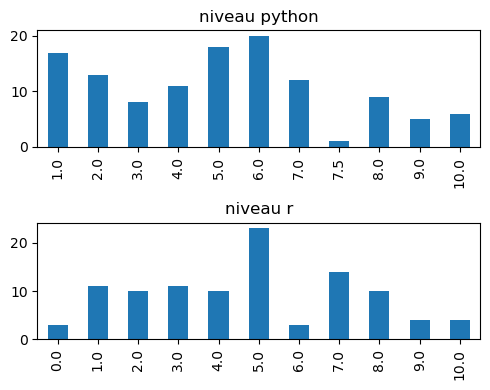

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(5,4))
data["niveau_python"].value_counts().sort_index().plot(kind='bar',title="niveau python",ax=ax[0])
data["niveau_r"].value_counts().sort_index().plot(kind='bar',title="niveau r",ax=ax[1])
plt.tight_layout()

Un niveau perçu d'usage de R plus homogène que Python parmi les répondants

## 5 Focus sur les usages des carnets interactifs Jupyter

### 5.1 Liste des questions posées :

Cette enquête était l'opportunité de poser une série de questions sur les carnets interactifs utilisés de plus en plus par les chercheurs. Ces questions étaient les suivantes : 

- "Connaissez-vous les Carnets interactifs (notebook) : par exemple Jupyter, Rmarkdown, Google Colab ? ": "entendu_jupyter"
- "Avez-vous déjà utilisé des Carnets interactifs (Jupyter ou Google Colab) ? ": "usage_jupyter"
- "Jupyter": "notebook_Jupyter", "Google Colab": "notebook_Google Colab", "Autre.1": "notebook_Autre.1"
- "Quelle est votre familiarité avec les Carnets interactifs ?": "familiarite_notebook"
- "Avez-vous déjà eu au moins une expérience de travail qui utilisait des Carnets interactifs ? ": "experience_notebook"
- "Comment situez-vous votre pratique  sur une échelle de 1 à 10: "niveau_notebook"
- "Pourriez-vous décrire votre expérience ? ": "pratique_notebook",
- "Nous sommes à la recherche d'exemples pour faciliter le partage de ces pratiques, donc si possible, indiquez le nom du / des projets ? .2": "exemple_notebook"
- "Depuis combien de temps utilisez-vous des Carnets interactifs dans le cadre de vos travaux ?": "temps_notebook"
- "Connaissez-vous ou collaborez-vous avec des collègues utilisant des Carnets interactifs dans le cadre de leurs recherches ?   ": "collegue_notebook"
- " Quels sont les principaux traitements que vous réalisez à l'aide des des Carnets interactifs dans le cadre de vos recherches ? : "traitement_notebook"
- "Quel(s) type(s) de solution(s) des Carnets interactifs vous utilisez (Google Colab, installation locale ou autre) ?   ": "type_notebook"
- "Quelles sont les ressources (formation en-ligne, cours en présentiel, manuels, tutoriels) que vous trouvez les plus utiles pour l'utilisation des Carnets interactifs pour conseiller à un collègue qui voudrait débuter ?": "ressources_notebook"

### 5.2 Distribution des réponses

Cela permet de faire un point général sur la place des carnets interactifs parmi les acteurs des SHS computationnelles.

In [7]:
pd.concat({"Entendu parler des carnets interactifs":pyshs.tri_a_plat(data,"entendu_jupyter"),
 "Usage":pyshs.tri_a_plat(data,"usage_jupyter"),
 "Usage depuis":pyshs.tri_a_plat(data,"temps_notebook"),
 "Niveau de familiarité":pyshs.tri_a_plat(data,"familiarite_notebook"),
 "Vos collègues en utilisent":pyshs.tri_a_plat(data,"collegue_notebook"),
 })

Effectif  \
Entendu parler des carnets interactifs Non, je ne connais pas      56.0   
                                       Oui, je connais            150.0   
                                       Total                      206.0   
Usage                                  Non                         37.0   
                                       Oui                        109.0   
                                       Total                      146.0   
Usage depuis                           0-3                         96.0   
                                       3-5                         23.0   
                                       5-10                        13.0   
                                       Total                      132.0   
Niveau de familiarité                  1-entendu parlé             30.0   
                                       2-usage débutant            52.0   
                                       3-usage intermédiaire       41.0   
                                       4-usage avancé              23.0   
                                       NA                           1.0   
                                       Total                      147.0   
Vos collègues en utilisent             1-Non                       35.0   
                                       2-Oui, beaucoup             27.0   
                                       2-Oui, quelques uns         76.0   
                                       Total                      138.0   

                                                               Pourcentage (%)  
Entendu parler des carnets interactifs Non, je ne connais pas             27.2  
                                       Oui, je connais                    72.8  
                                       Total                             100.0  
Usage                                  Non                                25.3  
                                       Oui                                74.7  
                                       Total                             100.0  
Usage depuis                           0-3                                72.7  
                                       3-5                                17.4  
                                       5-10                                9.8  
                                       Total                              99.9  
Niveau de familiarité                  1-entendu parlé                    20.4  
                                       2-usage débutant                   35.4  
                                       3-usage intermédiaire              27.9  
                                       4-usage avancé                     15.6  
                                       NA                                  0.7  
                                       Total                             100.0  
Vos collègues en utilisent             1-Non                              25.4  
                                       2-Oui, beaucoup                    19.6  
                                       2-Oui, quelques uns                55.1  
                                       Total                             100.1

La grande majorité des répondants ont connaissance des notebooks et des collègues qui les utilisent, et parmi ceux qui connaissent les trois quart les utilisent. Seule une petite proportion des répondants disent avoir un usage avancé (23 sur 206). 

In [10]:
pd.concat({"Jupyter":pyshs.tri_a_plat(data.fillna("NA"),"notebook_Jupyter"),
"Colab":pyshs.tri_a_plat(data.fillna("NA"),"notebook_Google Colab"),
"Autre":pyshs.tri_a_plat(data.fillna("NA"), "notebook_Autre.1")},axis=1)

Jupyter                    Colab                    Autre  \
      Effectif Pourcentage (%) Effectif Pourcentage (%) Effectif   
NA       103.0            50.0    156.0            75.7    177.0   
X        103.0            50.0     50.0            24.3     29.0   
Total    206.0           100.0    206.0           100.0    206.0   

                       
      Pourcentage (%)  
NA               85.9  
X                14.1  
Total           100.0

Les carnets Jupyter sont les plus utilisés (50% des répondants).

### 5.3 Relation avec les caractéristiques des répondants

#### Analyse bivariée

Nous testons la relation entre la pratique des carnets et les variables socio-professionnelles collectées

In [31]:
t,p = pyshs.tableau_croise(data,"age","familiarite_notebook",p=True)
print("Pas de relation statistiquement significative entre l'usage et l'âge (p=%f)"%p)
t

Pas de relation statistiquement significative entre l'usage et l'âge (p=0.281623)


familiarite_notebook,1-entendu parlé,2-usage débutant,3-usage intermédiaire,4-usage avancé,NA,Total
age,,,,,,
1. <25,2.0 (11.8%),4.0 (23.5%),9.0 (52.9%),2.0 (11.8%),0.0 (0.0%),17 (100%)
2. 26 - 35,14.0 (23.0%),23.0 (37.7%),14.0 (23.0%),10.0 (16.4%),0.0 (0.0%),61 (100%)
3. 36 - 45,6.0 (17.1%),10.0 (28.6%),10.0 (28.6%),9.0 (25.7%),0.0 (0.0%),35 (100%)
5. 46 - 55,6.0 (20.7%),14.0 (48.3%),6.0 (20.7%),2.0 (6.9%),1.0 (3.4%),29 (100%)
5. >56,2.0 (40.0%),1.0 (20.0%),2.0 (40.0%),0.0 (0.0%),0.0 (0.0%),5 (100%)
Total,30.0 (20.4%),52.0 (35.4%),41.0 (27.9%),23.0 (15.6%),1.0 (0.7%),147 (100%)


Toutefois on observe un faible usage avancé pour les répondants les plus âgés, pointant un potentiel effet générationnel.

In [33]:
t,p = pyshs.tableau_croise(data,"genre","familiarite_notebook",p=True)
print("Pas de relation statistiquement significative entre l'usage et le genre (p=%f)"%p)
t

Pas de relation statistiquement significative entre l'usage et le genre (p=0.591719)


familiarite_notebook,1-entendu parlé,2-usage débutant,3-usage intermédiaire,4-usage avancé,NA,Total
genre,,,,,,
Autre,0.0 (0.0%),4.0 (66.7%),1.0 (16.7%),1.0 (16.7%),0.0 (0.0%),6 (100%)
F,15.0 (23.8%),24.0 (38.1%),17.0 (27.0%),7.0 (11.1%),0.0 (0.0%),63 (100%)
H,15.0 (19.5%),24.0 (31.2%),22.0 (28.6%),15.0 (19.5%),1.0 (1.3%),77 (100%)
Total,30.0 (20.5%),52.0 (35.6%),40.0 (27.4%),23.0 (15.8%),1.0 (0.7%),146 (100%)


In [34]:
t,p = pyshs.tableau_croise(data,"statut","familiarite_notebook",p=True)
print("Pas de relation statistiquement significative entre l'usage et le statut (p=%f)"%p)
t

Pas de relation statistiquement significative entre l'usage et le statut (p=0.993892)


familiarite_notebook,1-entendu parlé,2-usage débutant,3-usage intermédiaire,4-usage avancé,NA,Total
statut,,,,,,
Chercheur,3.0 (21.4%),3.0 (21.4%),5.0 (35.7%),3.0 (21.4%),0.0 (0.0%),14 (100%)
Doctorant,6.0 (20.0%),10.0 (33.3%),9.0 (30.0%),5.0 (16.7%),0.0 (0.0%),30 (100%)
Enseignant-chercheur,5.0 (17.9%),9.0 (32.1%),8.0 (28.6%),6.0 (21.4%),0.0 (0.0%),28 (100%)
Etudiant (jusqu'au master 2),2.0 (13.3%),7.0 (46.7%),5.0 (33.3%),1.0 (6.7%),0.0 (0.0%),15 (100%)
Ingénieur d'études,7.0 (20.0%),15.0 (42.9%),8.0 (22.9%),4.0 (11.4%),1.0 (2.9%),35 (100%)
Ingénieur de recherche,4.0 (26.7%),5.0 (33.3%),3.0 (20.0%),3.0 (20.0%),0.0 (0.0%),15 (100%)
Post-doctorant,3.0 (30.0%),3.0 (30.0%),3.0 (30.0%),1.0 (10.0%),0.0 (0.0%),10 (100%)
Total,30.0 (20.4%),52.0 (35.4%),41.0 (27.9%),23.0 (15.6%),1.0 (0.7%),147 (100%)


In [35]:
t,p = pyshs.tableau_croise(data,"contrat","familiarite_notebook",p=True)
print("Pas de relation statistiquement significative entre l'usage et le statut (p=%f)"%p)
t

Pas de relation statistiquement significative entre l'usage et le statut (p=0.523708)


familiarite_notebook,1-entendu parlé,2-usage débutant,3-usage intermédiaire,4-usage avancé,NA,Total
contrat,,,,,,
CDI de droit privé,5.0 (45.5%),2.0 (18.2%),2.0 (18.2%),2.0 (18.2%),0.0 (0.0%),11 (100%)
Non titulaire (CDD),11.0 (17.7%),21.0 (33.9%),20.0 (32.3%),10.0 (16.1%),0.0 (0.0%),62 (100%)
Titulaire de la fonction publique,12.0 (18.2%),26.0 (39.4%),18.0 (27.3%),9.0 (13.6%),1.0 (1.5%),66 (100%)
Total,28.0 (20.1%),49.0 (35.3%),40.0 (28.8%),21.0 (15.1%),1.0 (0.7%),139 (100%)


Tester chaque disciplines vs. les autres pour voir s'il existe une différence significative dans l'usage des carnets

In [21]:
disciplines = set([j for i in list(data["disciplines"]) for j in i])
for d in disciplines:
    data[d] = data["disciplines"].apply(lambda x : True if d in x else False)
    t,p = pyshs.tableau_croise(data,d,"familiarite_notebook",p=True)
    print(d,round(p,4))


Sociologie 0.7585
Urbanisme 1.0
Démographie 0.6263
Archéologie 0.0287
Arts 1.0
Science de l’éducation 0.416
Littérature 0.3891
Anthropologie 0.9531
Philosophie 0.0447
Linguistique 0.001
Droit 0.7653
Religion 0.416
Science politique 0.9493
Informatique 0.416
Géographie 0.7887
Histoire 0.3344
Economie 0.0894
Humanités numériques 0.7463
SIC 0.9531
Psychologie 0.7969
Autre 0.4487


Il n'y a pas de différences significatives qui apparaissent dans l'usage des notebooks.

#### Analyse multivariée

Avec une régression logistique, il apparaît toutefois que l'âge est un facteur qui pourrait peser dans un usage moindre : plus les répondants sont âgés, moins ils sont susceptibles d'avoir un usage modéré ou avancé.

In [30]:
data["usage_nb"] = data["familiarite_notebook"].apply(lambda x : 1 if x in ["3-usage intermédiaire","4-usage avancé"] else 0)
pyshs.regression_logistique(data,"usage_nb",["genre","age",'statut'])

OR        p             IC 95%
Variable   Modalité                                                      
.Intercept                               2.28    0.471  2.28 [0.24-21.39]
age        1. <25                         ref                            
           2. 26 - 35                    0.24   0.016*   0.24 [0.07-0.77]
           3. 36 - 45                    0.23    0.03*   0.23 [0.06-0.87]
           5. 46 - 55                     0.1  0.002**   0.10 [0.02-0.43]
           5. >56                        0.04  0.002**   0.04 [0.01-0.31]
genre      Autre                          ref                            
           F                             0.92    0.929   0.92 [0.15-5.68]
           H                             1.95    0.469  1.95 [0.32-11.87]
statut     Chercheur                      ref                            
           Doctorant                     0.53     0.34   0.53 [0.14-1.96]
           Enseignant-chercheur          1.08    0.899   1.08 [0.33-3.50]
           Etudiant (jusqu'au master 2)   0.4    0.264   0.40 [0.08-2.01]
           Ingénieur d'études            0.52    0.295   0.52 [0.15-1.77]
           Ingénieur de recherche         1.1    0.896   1.10 [0.27-4.46]
           Post-doctorant                0.55    0.461   0.55 [0.11-2.68]

### 5.4 Synthèse sur les questions ouvertes des usages

#### Création d'un nuage de mots sur la question de l'expérience des notebooks

Pour faire un nuage de mots, nous utilisons la bibliothèque SpaCy pour rapidement procéder à une tokénisation/lemmatisation.

In [41]:
import spacy
import wordcloud
from itertools import chain

#!python -m spacy download fr_core_news_md
nlp = spacy.load("fr_core_news_md")

In [79]:
# extraire tous les commentaires
d = pd.DataFrame(data[["pratique_notebook"]].apply(lambda x : "\n".join([str(j) for j in x]),axis=1)\
.replace("nan\nnan",None).dropna().str.replace("\n"," ").str.replace("\r"," "),columns=["textes"])

#ajouter une colonne tokenisée
d["tok"] = d["textes"].apply(lambda x : [token.text for token in nlp(x)])

# ajouter une colonne lemmatisée
d["lem"] = d["textes"].apply(lambda x : [token.lemma_ for token in nlp(x)])

Création d'un texte global filtrant certains éléments

In [80]:
# uniquement les mots lemmatisés
texte_complet = list(chain.from_iterable(list(d["lem"])))
# mots à enlever
stopwords = ["pour","plus"]
# enlever les mots de trois lettres ou moins
texte_complet = [i for i in texte_complet if len(i)>3 and not i in stopwords]

Construction du nuage de mots

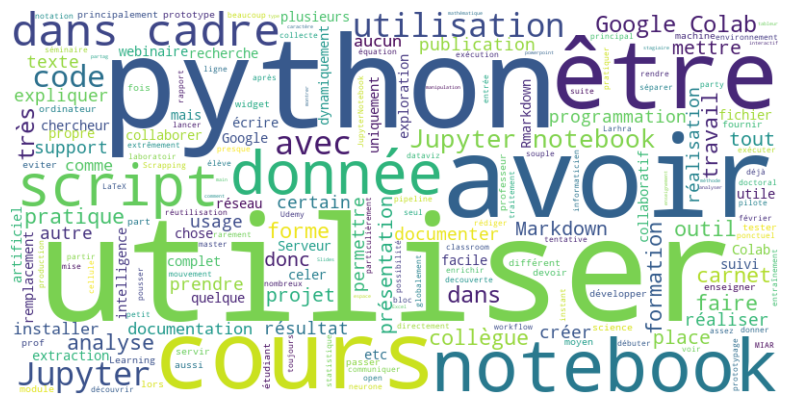

In [81]:
nuage_de_mots = wordcloud.WordCloud(width=800, height=400, background_color='white').generate(" ".join(texte_complet))

# Affichez le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(nuage_de_mots, interpolation='bilinear')
plt.axis("off")
plt.show()

Lecture qualitative et identification des différents usages mentionnés par les répondants dans le questionnaire :

- uniquement expérimenté lors du suivi de formation et de cours
- publication des résultats de recherche sous forme de JupyterNotebook
- exploration des données
- réutilisation de notebooks créés par d'autres (informaticiens)
- workflow complet
- améliorer la documentation des scripts
- pour la réalisation des preuves de concepts
- uniquement pour les petits scripts
- former les stagiaires dans l'équipe
- support du travail collaboratif

## 6 Ressources liées


- [Maxime Popineau, Émilien Schultz, Marie-Laure Massot, Agnès Tricoche. Les carnets numériques interactifs en Sciences humaines et sociales : l'exemple des carnets Jupyter. Initiative Digit_Hum; EUR Translitteræ; CAPHÉS (UMS 3610, CNRS-ENS); AOROC (UMR 8546, CNRS-ENS-EPHE). 2023, 12 p.](https://hal.science/hal-04161172)
- [Maxime Popineau, rapport réalisé en stage de Master 2 coencadré par Marie-Laure Massot, Emillien Schultz et Agnès Tricoche. Un panorama des pratiques informatiques dans les publications de recherche dans la base de données HAL, un exemple des bonnes pratiques à mettre en place pour constituer un Notebook](https://popineaumaxime-les.curve.space/myst/markdown-notebooks)
- [Vidéos de l'Atelier Digit_Hum 2023 « Manipuler des données en SHS : R, Python et les carnets interactifs" (12/10/2023, ENS PSL)](https://digithum.huma-num.fr/atelier/2023/)